### Importing Necessary Package

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from jcopml.plot import plot_missing_value

### Reading Dataset

In [2]:
df = pd.read_csv("bri/train/train.csv")
df.drop(columns=['job_level','person_level', 'gender', 'marital_status_maried(Y/N)'], inplace=True)
df.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,1.352775,1.352775,1.732051,RM_type_A,1985,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,1.292285,1.292285,1.039230,RM_type_A,1989,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,2.565151,2.308679,1.780449,RM_type_C,1970,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,2.828427,1.000000,1.385641,RM_type_A,1967,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,2.828427,2.828427,0.707107,RM_type_A,1965,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


### Finding Missing Value

In [3]:
print(df.isnull().sum())

job_duration_in_current_job_level        0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
age                                      0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64


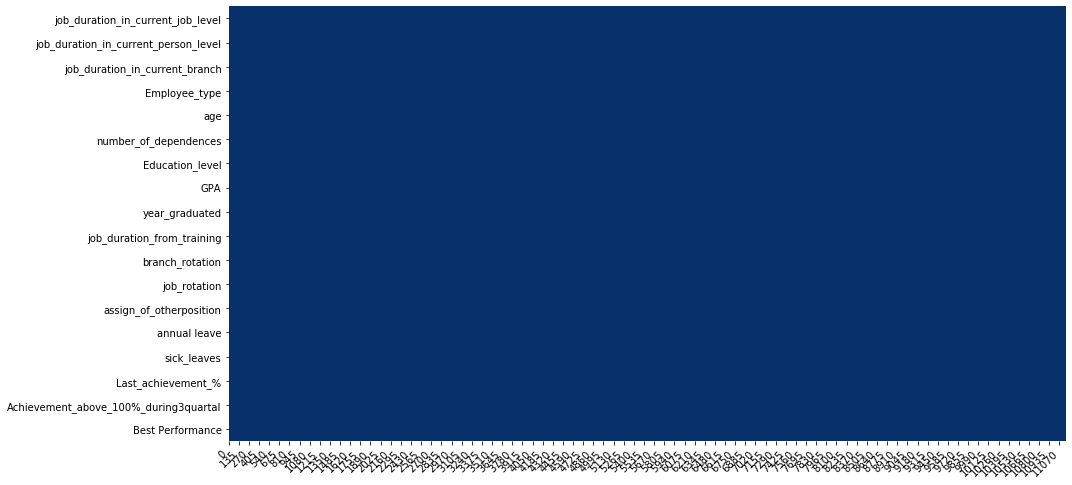

In [4]:
from jcopml.plot import plot_missing_value
plot_missing_value(df)

### Calculating Employee Age

In [3]:
df['age'] = 2021 - df['age']
df.age

0        36
1        32
2        51
3        54
4        56
         ..
11148    35
11149    33
11150    30
11151    34
11152    41
Name: age, Length: 11153, dtype: int64

In [4]:
print(df.age[11150])
print(df.age[1])
print(df.age[2])
print(df.age[4])
print(df.age[11152])

30
32
51
56
41


### Data Binning for Age Feature

In [5]:
df.age = pd.cut(df.age, [19, 29, 39, 49, 59, 69], labels=['20s', '30s', '40s', '50s', '60s'])
df.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,1.352775,1.352775,1.732051,RM_type_A,30s,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,1.292285,1.292285,1.039230,RM_type_A,30s,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,2.565151,2.308679,1.780449,RM_type_C,50s,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,2.828427,1.000000,1.385641,RM_type_A,50s,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,2.828427,2.828427,0.707107,RM_type_A,50s,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


In [6]:
print(df.age[11150])
print(df.age[1])
print(df.age[2])
print(df.age[4])
print(df.age[11152])

30s
30s
50s
50s
40s


### Feature Engineering for Number of Dependences

In [7]:
df['isAlone'] = (df.number_of_dependences == 0)
df.drop(columns='number_of_dependences', inplace=True)

In [9]:
df.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,age,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,isAlone
0,1.352775,1.352775,1.732051,RM_type_A,30s,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0,False
1,1.292285,1.292285,1.039230,RM_type_A,30s,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0,True
2,2.565151,2.308679,1.780449,RM_type_C,50s,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0,False
3,2.828427,1.000000,1.385641,RM_type_A,50s,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1,False
4,2.828427,2.828427,0.707107,RM_type_A,50s,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0,False


### Dataset Splitting

In [10]:
X = df.drop(columns="Best Performance")
y = df['Best Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7807, 17), (3346, 17), (7807,), (3346,))

### Building Pipeline for Training

In [12]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal']),
    ('categoric', cat_pipe(encoder='onehot'), ['Employee_type', 'age', 'Education_level', 'year_graduated', 'isAlone']),
])

from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

### Training with Hyperparameter Tuning

In [13]:
from skopt import BayesSearchCV
from jcopml.tuning import bayes_search_params as bsp

model = BayesSearchCV(pipeline, bsp.rf_params, cv=4, n_iter=10, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   32.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   22.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   36.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   52.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   33.4s finished


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   35.3s finished
D:\MUTHIA\Anaconda\envs\jcopml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
D:\MUTHIA\Anaconda\envs\jcopml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


OrderedDict([('algo__max_depth', 69), ('algo__max_features', 0.2546844052569046), ('algo__min_samples_leaf', 12), ('algo__n_estimators', 180)])


D:\MUTHIA\Anaconda\envs\jcopml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


0.8532086588958627 0.8532086588958627 0.8532576210400478


### Uploading Test Set

In [14]:
test = pd.read_csv('bri/test.csv') # cek index
test.drop(columns=['job_level','person_level', 'gender', 'marital_status_maried(Y/N)'], inplace=True)
test.head()
test.shape

(6000, 17)

### Predicting Employee Probability for Giving Best Performance

In [15]:
#y_pred = model.predict(test)
y_pred_proba = model.predict_proba(test)[:,1]

D:\MUTHIA\Anaconda\envs\jcopml\lib\site-packages\sklearn\compose\_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
D:\MUTHIA\Anaconda\envs\jcopml\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [16]:
sub = pd.DataFrame(test)
sub['index'] = test.index
sub['Best Performance'] = y_pred_proba
sub.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,index,Best Performance
0,1.256981,1.256981,0.707107,RM_type_A,1988,0,level_3,3.08,2009,6,4,2,6,3,7,84.02,0.0,0,0.114952
1,1.224745,1.224745,1.256981,RM_type_B,1991,0,level_4,3.31,2014,2,2,2,0,1,0,63.74,0.0,1,0.153131
2,0.500000,0.500000,1.081665,RM_type_A,1989,1,level_4,3.44,2011,4,2,2,0,2,1,88.19,1.0,2,0.257083
3,1.256981,1.256981,1.802776,RM_type_A,1990,1,level_4,0.00,2014,3,1,3,0,3,0,25.94,0.0,3,0.135789
4,1.352775,1.352775,1.224745,RM_type_B,1985,0,level_4,3.34,2007,5,3,2,0,3,0,82.32,0.0,4,0.123553


In [17]:
sub.drop(columns=['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'number_of_dependences', 'Education_level', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'Employee_type', 'age', 'year_graduated'], inplace=True)
sub.head()

,index,Best Performance
0,0,0.114952
1,1,0.153131
2,2,0.257083
3,3,0.135789
4,4,0.123553


### Calculating ROC-AUC Mean Score

In [18]:
# cross validation score
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X, y, cv=4, scoring="roc_auc", n_jobs=-1)
print("RF ROC-AUC Mean Score: ", np.mean(score))

XGB ROC-AUC Mean Score:  0.5758744267323477


In [19]:
sub.to_csv(r'bri/submission_file_rf.csv', index=False)